In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import time
from time import mktime
from datetime import datetime
%matplotlib inline

In [5]:
def to_date(str_date, float_flag=False):
    str_format = '%Y-%m-%d %H:%M:%S'
    if float_flag: 
        str_format += '.%f' 
    return datetime.strptime(str_date, str_format).timetuple()

def visualize(data):
    df = pd.read_csv('data/realTweets/Twitter_volume_'+data+'.csv', delimiter = ',')

    json_f = open('data/anomalies.json')
    json_str = json_f.read()
    labels_dict = json.loads(json_str)
    labels = labels_dict['realTweets/Twitter_volume_'+data+'.csv']
    labels = [(to_date(l, True), to_date(u, True)) for l, u in labels]

    df['timestamp'] = df['timestamp'].apply(to_date)
    df['label'] = 0
    df['label'] = df['timestamp'].apply(lambda t: np.sum([l <= t <= u for l, u in labels]) > 0)
    df['timestamp'] = df['timestamp'].apply(lambda t: matplotlib.dates.date2num(datetime.fromtimestamp(mktime(t))))

    plt.figure(figsize=(8,4))
    plt.plot(df[df['label']]['timestamp'], df[df['label']]['value'], c='r')
    plt.plot(df[df['label'] == False]['timestamp'], df[df['label'] == False]['value'], c='b')
    plt.title(data)
    plt.xlabel('Timestamp')
    plt.ylabel('Mentions Per 5 Minutes')
    plt.show()
    
    return df

def summary_stats(df):
    return np.mean(df[df['label']]['value'].values), np.mean(df[df['label'] == False]['value'].values)

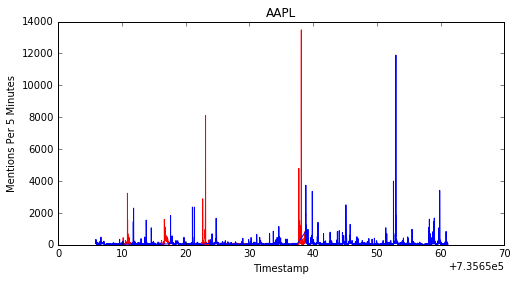

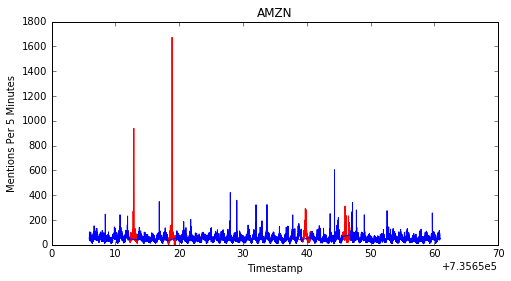

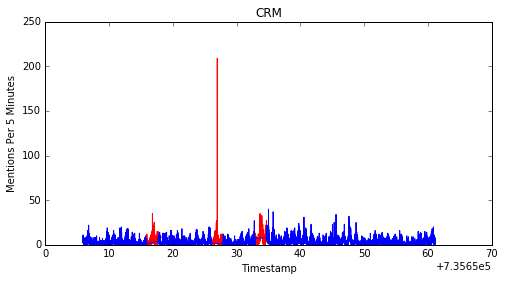

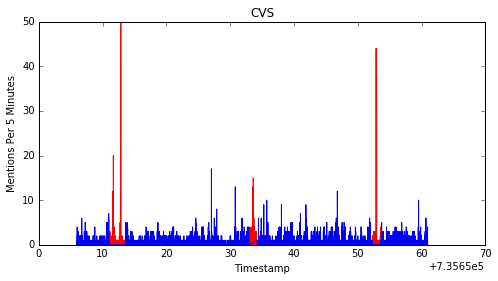

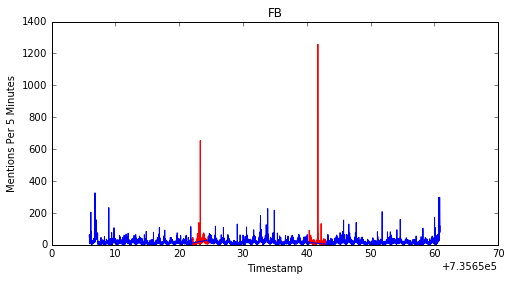

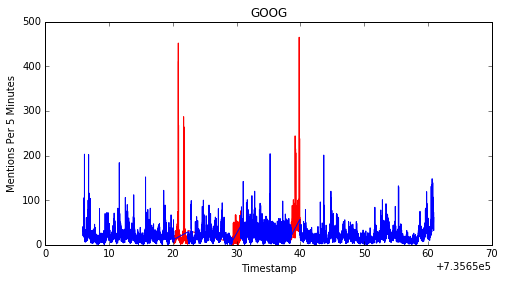

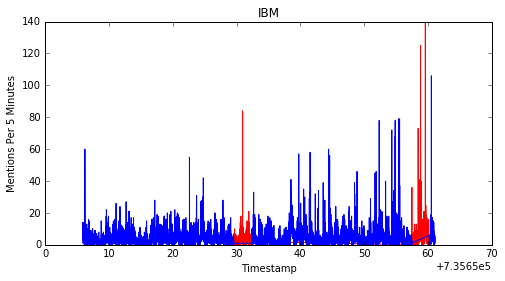

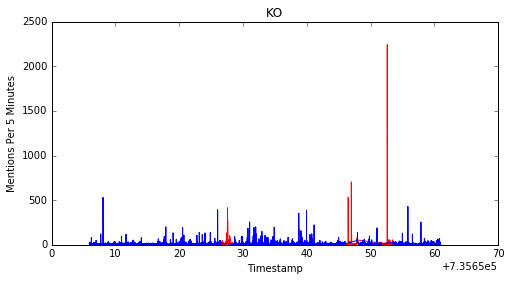

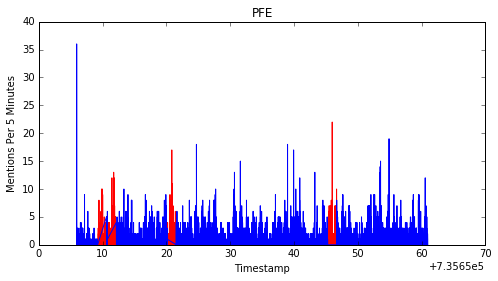

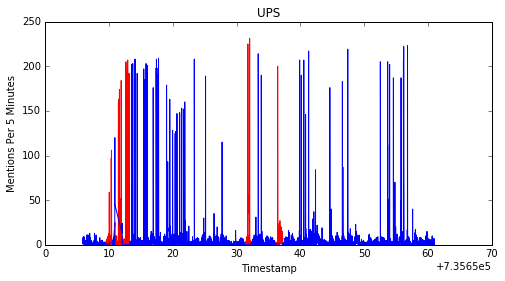

{'GOOG': (29.12081005586592, 19.903192227619709), 'PFE': (1.3060453400503778, 0.8176594253679047), 'IBM': (5.5264150943396224, 4.2639306439208555), 'AAPL': (214.98677581863979, 71.192818219924547), 'KO': (16.797101449275363, 10.796480650588896), 'CVS': (0.61795543905635653, 0.33210023033433378), 'FB': (18.146649810366625, 17.774050943793419), 'AMZN': (63.406329113924052, 52.177812083362568), 'UPS': (10.562145110410095, 4.8896435823821864), 'CRM': (6.1688637790332708, 3.035432245439933)}


In [11]:
datasets = ['AAPL', 'AMZN', 'CRM', 'CVS', 'FB', 'GOOG', 'IBM', 'KO', 'PFE', 'UPS']
stats = {data: summary_stats(visualize(data)) for data in datasets}

In [15]:
for company, (s1, s2) in stats.iteritems():
    print '{} & {} & {} \\\\'.format(company, s1, s2)

GOOG & 29.1208100559 & 19.9031922276 \\
PFE & 1.30604534005 & 0.817659425368 \\
IBM & 5.52641509434 & 4.26393064392 \\
AAPL & 214.986775819 & 71.1928182199 \\
KO & 16.7971014493 & 10.7964806506 \\
CVS & 0.617955439056 & 0.332100230334 \\
FB & 18.1466498104 & 17.7740509438 \\
AMZN & 63.4063291139 & 52.1778120834 \\
UPS & 10.5621451104 & 4.88964358238 \\
CRM & 6.16886377903 & 3.03543224544 \\
